<>:35: SyntaxWarning: invalid escape sequence '\s'
<>:35: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_475/63599056.py:35: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('$\sigma_{ij}$')


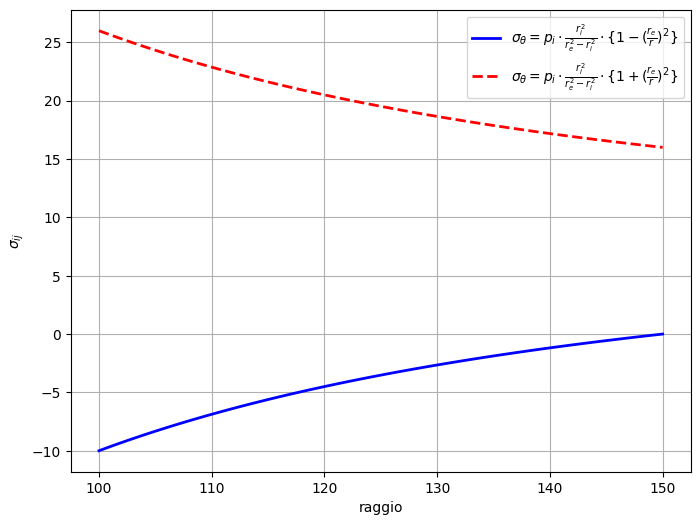

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Function to evaluate the first expression
def sigma_radiale(r, r_i, r_e, p_i):
    return p_i * (r_i**2 / (r_e**2 - r_i**2)) * (1 - (r_e / r)**2)

# Function to evaluate the second expression
def sigma_anulare(r, r_i, r_e, p_i):
    return p_i * (r_i**2 / (r_e**2 - r_i**2)) * (1 + (r_e / r)**2)

# Input values for r_i, r_e, and p_i
r_i = float(input("Enter the value of r_i: "))
r_e = float(input("Enter the value of r_e: "))
p_i = float(input("Enter the value of p_i: "))

# Define the range for the free variable 'r'
r = np.linspace(r_i, r_e, 100)  # r varies between r_i and r_e

# Compute the expressions for all values of 'r'
y1 = sigma_radiale(r, r_i, r_e, p_i)
y2 = sigma_anulare(r, r_i, r_e, p_i)

# Create the plot
plt.figure(figsize=(8, 6))

# Plot the first expression
plt.plot(r, y1, label=r'$\sigma_{\theta} = p_i \cdot \frac{r_i^{2}}{r_e^{2}-r_i^{2}} \cdot \{ 1- ( \frac{r_e}{r})^{2} \}$', color='b', linestyle='-', linewidth=2)

# Plot the second expression
plt.plot(r, y2, label=r'$\sigma_{\theta} = p_i \cdot \frac{r_i^{2}}{r_e^{2}-r_i^{2}} \cdot \{ 1+ ( \frac{r_e}{r})^{2} \}$', color='r', linestyle='--', linewidth=2)

# Label the axes
plt.xlabel('raggio')
plt.ylabel('$\sigma_{ij}$')

# Add grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()
